In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Set the figure size (width and height) in inches
fig = plt.figure(figsize=(4, 3))

sns.set_style("ticks")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/housing-prices-dataset-philippines/Housing Prices Philippines Lamudi.csv
/kaggle/input/housing-prices-dataset-philippines/Housing Prices Dotproperty.csv


<Figure size 400x300 with 0 Axes>

In [2]:
my_filepath = "/kaggle/input/housing-prices-dataset-philippines/Housing Prices Dotproperty.csv"
dataset = pd.read_csv(my_filepath)

# Print the head of the dataset
dataset.head()

,Title,Land area,Usable area,Floors,Beds,Baths,Price
0,"MOVE-IN READY, BRAND NEW HOUSE IN PRISTINA NOR...",139.0,149.0,1,3.0,3.0,15906000
1,"HOUSE FOR SALE IN BANAWA, CEBU CITY WITH LOT A...",649.0,300.0,1,3.0,3.0,30000000
2,"Move-In Ready, Brand New, Modern House For Sal...",275.0,430.0,1,4.0,5.0,20000000
3,Rush Sale! 500 SQM in Southbay Garden Paranaque.,NaN,500.0,2,7.0,4.0,39500000
4,Affordable House and Lot for Sale in Tanza Cav...,44.0,40.0,2,2.0,1.0,1800000


From the above table, we can see that there exists at least one row that has a missing entry. Note that the data set contains the columns `Title`, `Land area`, `Usable area`, `Floors`, `Beds`, `Baths`, and `Price`. From this, we can predict the value of a house based on the predictors we have. We will formulate a linear regression from the data set.

In [3]:
# We describe the data
print(dataset.describe())
print(dataset.dtypes)

# We determine the dimension of the data
print(dataset.shape)

           Land area    Usable area      Floors        Beds       Baths  \
count     740.000000     905.000000  918.000000  914.000000  914.000000   
mean     1913.288514    1669.990055    1.966231    3.703501    3.192560   
std     16595.384682   15000.367748    0.691081    1.199968    1.475655   
min        27.000000      24.000000    1.000000    2.000000    1.000000   
25%        87.500000      89.730000    2.000000    3.000000    2.000000   
50%       120.000000     169.000000    2.000000    4.000000    3.000000   
75%       200.000000     390.000000    2.000000    4.000000    4.000000   
max    190000.000000  190000.000000    5.000000    8.000000    8.000000   

              Price  
count  9.180000e+02  
mean   5.998635e+07  
std    1.313768e+08  
min    5.000000e+04  
25%    5.781231e+06  
50%    1.228401e+07  
75%    3.300000e+07  
max    9.930420e+08  
Title           object
Land area      float64
Usable area    float64
Floors           int64
Beds           float64
Baths      

In [4]:
# We first need to clean the data
# We look for the number of rows that has a missing value
num_rows_missing_val = dataset.isnull().sum(axis = 1).sum()

print(num_rows_missing_val)

199


Notice that there are 199 rows that have missing values in the data set. 

In [5]:
# We sort the price column so we can determine if we are going to neglect the missing values in the data set or we will apply some techniques to fill them
data_sorted = dataset.sort_values(by = "Price", ascending = True)
data_sorted

,Title,Land area,Usable area,Floors,Beds,Baths,Price
498,"HOUSE AND LOT FOR SALE in Santiago City, Isabe...",104000.0,104000.0,2,2.0,2.0,50000
164,"HOUSE AND LOT FOR SALE in Cauayan City, Isabel...",190000.0,190000.0,2,5.0,3.0,70000
169,"HOUSE AND LOT FOR SALE in Cauayan City, Isabel...",190000.0,190000.0,2,5.0,3.0,70000
341,MODERN HOUSE DESIGN IN UPTOWN CDO for SALE.,120.0,120.0,2,4.0,3.0,100000
350,"Ready To Occupy House in GENSAN, as low as 9,8...",35.0,24.0,1,NaN,1.0,950000
...,...,...,...,...,...,...,...
158,Nice House for Sale in Forbes Park Makati.,NaN,1398.0,1,4.0,5.0,655011008
104,Renovated House for Sale Forbes Park Makati.,NaN,1500.0,1,5.0,6.0,755054976
157,Renovated House for Sale Forbes Park Makati.,NaN,1500.0,1,5.0,6.0,755054976
188,Renovated House for Sale Forbes Park Makati.,NaN,1500.0,1,5.0,6.0,755054976


In [6]:
# We cleaned the data by removing the rows with at least one missing value
# This is because the data came from a website, so we can neglect the other entries
df_cleaned = data_sorted.dropna().reset_index()
df_cleaned.drop("index", axis = 1, inplace = True)

# We transform float columns into ints
float_columns = dataset.select_dtypes(include=['float']).columns
df_cleaned[float_columns]  = df_cleaned[float_columns].astype(int)

# We check for duplicates
duplicates = df_cleaned.duplicated().sum()
print(duplicates)

# There are 41 duplicates,so we remove them
df_cleaned = df_cleaned.drop_duplicates().reset_index()

# We scale the price column and the Land area
df_cleaned["Price Scaled"] = np.log10(df_cleaned["Price"])
df_cleaned["Usable Area Scaled"] = np.log10(df_cleaned["Usable area"])
df_cleaned["Land Area Scaled"] = np.log10(df_cleaned["Land area"])

# We delete the first three rows of the data. It seemed not plausible for the price to have those values as predictors. 
# Later on, we will also get back to the outliers in order to polish our data set
df_cleaned = df_cleaned.drop([0, 1, 2]).reset_index()
df_cleaned = df_cleaned.drop(columns = ['level_0', 'index'])

display(df_cleaned)
df_cleaned.describe()

41


,Title,Land area,Usable area,Floors,Beds,Baths,Price,Price Scaled,Usable Area Scaled,Land Area Scaled
0,Amaia Scapes San Pablo Laguna - 5% DP(70k) to ...,45,25,1,2,1,1400000,6.146128,1.397940,1.653213
1,The Affordable Bungalow with Parking for Sale ...,72,72,1,2,1,1500000,6.176091,1.857332,1.857332
2,"Php 1.5M Downpayment thru Bank Financing, Hous...",180,149,2,4,3,1500100,6.176120,2.173186,2.255273
3,The Affordable Townhouse in Pearl Residences i...,40,43,2,2,1,1600000,6.204120,1.633468,1.602060
4,DAHLIA 3 Bedroom Unit in Cabanatuan East Subdi...,100,50,2,3,1,1601138,6.204429,1.698970,2.000000
...,...,...,...,...,...,...,...,...,...,...
674,Dasmarinas Village House for Sale! Makati City.,620,500,1,4,4,402000000,8.604226,2.698970,2.792392
675,HOUSE FOR SALE WITH SWIMMING POOL IN THE PEAK ...,588,417,3,4,4,502350016,8.701006,2.620136,2.769377
676,"FOR SALE: House and Lot in Dasmarinas Village,...",1012,800,1,4,4,550000000,8.740363,2.903090,3.005181
677,For Sale: 5BR Elevated House in Dasmarines Vil...,1000,1636,1,5,5,600000000,8.778151,3.213783,3.000000


,Land area,Usable area,Floors,Beds,Baths,Price,Price Scaled,Usable Area Scaled,Land Area Scaled
count,679.000000,679.000000,679.000000,679.000000,679.000000,6.790000e+02,679.000000,679.000000,679.000000
mean,1344.237113,1333.590574,2.101620,3.612666,3.067747,2.369627e+07,7.047989,2.206519,2.171566
std,13412.592484,13391.771203,0.640322,1.184419,1.471902,5.453723e+07,0.464712,0.437568,0.425961
min,27.000000,25.000000,1.000000,2.000000,1.000000,1.400000e+06,6.146128,1.397940,1.431364
25%,87.000000,82.000000,2.000000,3.000000,2.000000,5.405524e+06,6.732838,1.913814,1.939491
50%,120.000000,150.000000,2.000000,3.000000,3.000000,1.017500e+07,7.007534,2.176091,2.079181
75%,200.000000,273.000000,2.000000,4.000000,4.000000,1.965000e+07,7.293350,2.436136,2.301030
max,190000.000000,190000.000000,5.000000,8.000000,8.000000,6.135000e+08,8.787815,5.278754,5.278754


Text(0, 0.5, 'Price in Logarithmic Scale')

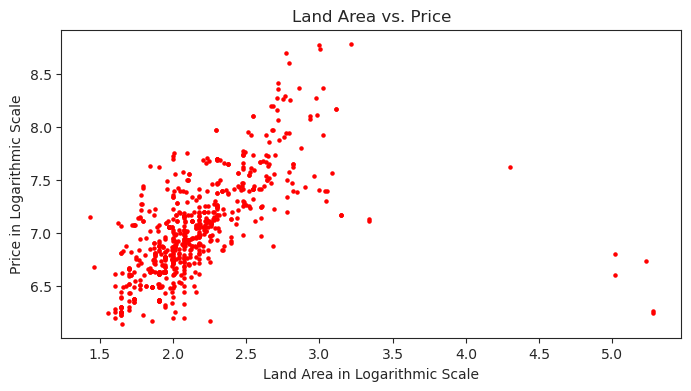

In [7]:
# Our response variable is the Price and the rest of the columns except the title are our predictors
# We plot first the land area vs price
fig = plt.figure(figsize=(8, 4))
plt.scatter(df_cleaned["Land Area Scaled"], df_cleaned["Price Scaled"], color='red', marker='o', s = 5)

plt.title("Land Area vs. Price")
plt.xlabel("Land Area in Logarithmic Scale")
plt.ylabel("Price in Logarithmic Scale")

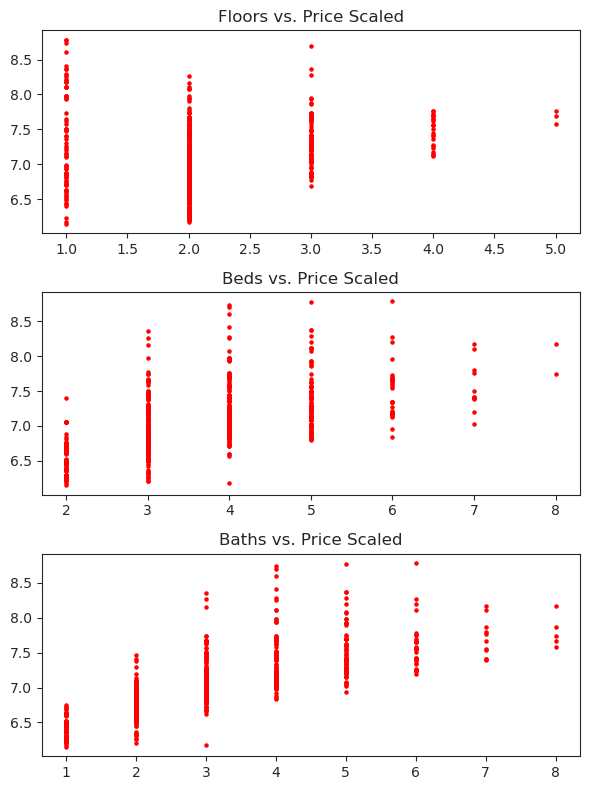

In [8]:
# We also plot floors, beds, and baths
fig, axes = plt.subplots(3, 1, figsize=(6, 8))

# Create each plot in its respective subplot
axes[0].scatter(df_cleaned["Floors"], df_cleaned["Price Scaled"], color='red', marker='o', s = 5)
axes[0].set_title('Floors vs. Price Scaled')

axes[1].scatter(df_cleaned["Beds"], df_cleaned["Price Scaled"], color='red', marker='o', s = 5)
axes[1].set_title('Beds vs. Price Scaled')

axes[2].scatter(df_cleaned["Baths"], df_cleaned["Price Scaled"], color='red', marker='o', s = 5)
axes[2].set_title('Baths vs. Price Scaled')

# Adjust spacing between subplots
plt.tight_layout()

From the figures above, we see an up trend for each predictor versus the price scaled. This means that there is a chance that there might be an existing relationship between at least one predictor and the response variable. We remove some outliers from the data. After, we will use linear regression to determine whether a relationship exists or not. We define the null hypothesis $H_0 : \beta_i = 0$ where $\beta_i$ is each predictor and $i = 1, 2, 3, 4$. 

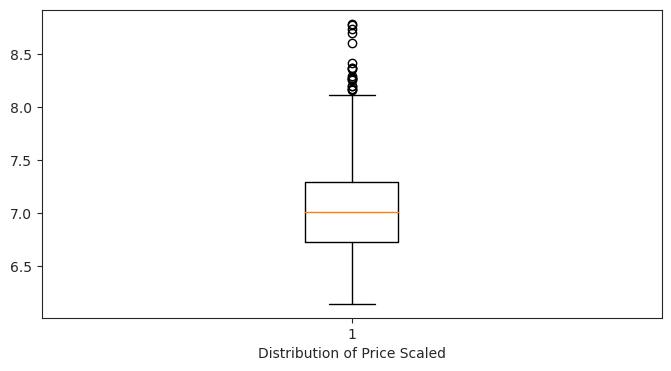

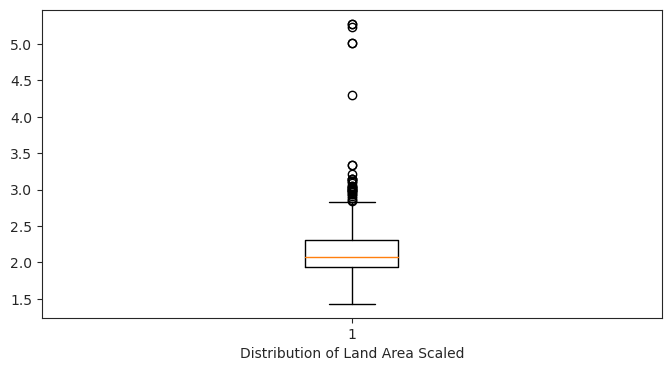

,Title,Land area,Usable area,Floors,Beds,Baths,Price,Price Scaled,Usable Area Scaled,Land Area Scaled
0,Amaia Scapes San Pablo Laguna - 5% DP(70k) to ...,45,25,1,2,1,1400000,6.146128,1.397940,1.653213
1,The Affordable Bungalow with Parking for Sale ...,72,72,1,2,1,1500000,6.176091,1.857332,1.857332
2,"Php 1.5M Downpayment thru Bank Financing, Hous...",180,149,2,4,3,1500100,6.176120,2.173186,2.255273
3,The Affordable Townhouse in Pearl Residences i...,40,43,2,2,1,1600000,6.204120,1.633468,1.602060
4,DAHLIA 3 Bedroom Unit in Cabanatuan East Subdi...,100,50,2,3,1,1601138,6.204429,1.698970,2.000000
...,...,...,...,...,...,...,...,...,...,...
652,Bungalow house with large garden for sale in S...,477,300,2,3,4,95000000,7.977724,2.477121,2.678518
653,Semi furnished 4 Bedroom 4BR Modern House for ...,198,450,1,4,5,95000000,7.977724,2.653213,2.296665
654,Prime Property at White Plains Quezon City.,520,400,2,4,5,118000000,8.071882,2.602060,2.716003
657,Magallanes Village House and Lot for Sale! Mak...,353,332,1,5,4,129000000,8.110590,2.521138,2.547775


Text(0.5, 0, 'Land Area Scaled')

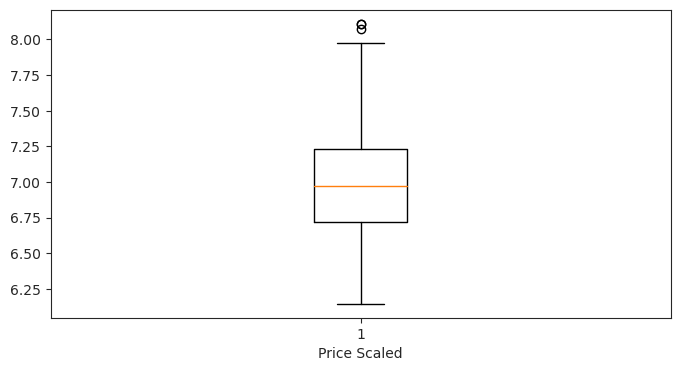

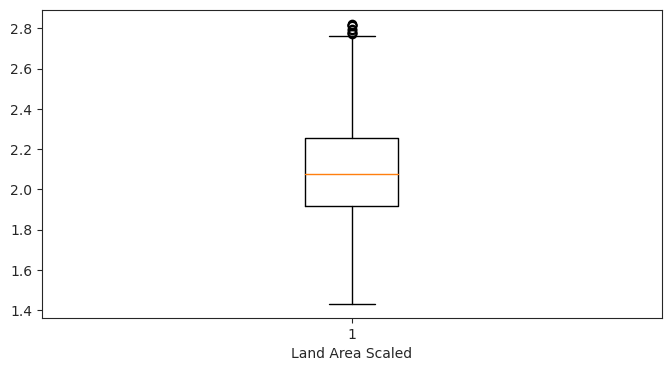

In [9]:
# We remove some outliers from the data set
# We determine them first by using the boxplots
fig = plt.figure(figsize=(8, 4))

plot1 = plt.boxplot(df_cleaned["Price Scaled"])
plt.xlabel("Distribution of Price Scaled")
plt.show()

fig = plt.figure(figsize=(8, 4))
plot2 = plt.boxplot(df_cleaned["Land Area Scaled"])
plt.xlabel("Distribution of Land Area Scaled")
plt.show()

# Filter the data to include only the outliers
outliers1 = plot1["fliers"][0].get_ydata()
outliers2 = plot2["fliers"][0].get_ydata()

# Filter the data
final_dataset = df_cleaned[~df_cleaned["Price Scaled"].isin(outliers1)] 
final_dataset = final_dataset[~final_dataset["Land Area Scaled"].isin(outliers2)]
display(final_dataset)

# Plot again using the boxplot
fig = plt.figure(figsize=(8, 4))

plt.boxplot(final_dataset["Price Scaled"])
plt.xlabel("Price Scaled")

# Plot again using the boxplot
fig = plt.figure(figsize=(8, 4))

plt.boxplot(final_dataset["Land Area Scaled"])
plt.xlabel("Land Area Scaled")

In [10]:
# Fit the model to the data
X = sm.add_constant(final_dataset[["Land Area Scaled", "Floors", "Beds", "Baths"]])
model = sm.OLS(final_dataset["Price Scaled"], X)

# We get the result of the multiple linear regression
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Price Scaled   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     430.6
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          1.02e-178
Time:                        08:17:29   Log-Likelihood:                 98.604
No. Observations:                 636   AIC:                            -187.2
Df Residuals:                     631   BIC:                            -164.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.0498      0.084  

### Analysis

From the summary result above, the coefficients for `Land Area Scaled`, `Floors`, `Beds`, `Baths` are 0.6810, 0.0987, -0.0407, and 0.1516, respectively. The F-statistic if 430.6 with a p-value of 1.02e-178. This shows that there is a statistical evidence in the relationship between the predictors (`Land Area Scaled`, `Floors`, `Beds`, `Baths`) and the response variable `Price`. Moreover, looking at the p-value of each predictor, we can see that the p-value of all predictors are significant, meaning that each of the independent variable contribute to the value of the response variable. Since we are using the logarithmic scale in the price and land area, we note that for every unit increase in the land area (10 times the value), there is also an approximately (not disregarding the other predictors) one unit increase in the price, that is, 10 times the peso value of the house. 

The R-squared for this regression is 0.732, which means that 73.2 percent of the total variation in the dependent variables can be explained by the response variable.